 # UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction

 UMAP is a dimensional reduction algorithm, akin to t-SNE and PCA.

 Code from [lmcinnes/umap](https://github.com/lmcinnes/umap).

 Installation: `pip install -upgrade umap-learn`.

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

from sklearn import (datasets, decomposition, manifold)
import umap as umap


In [2]:

# Load MNIST dataset
mnist = datasets.fetch_openml('mnist_784')
# mnist = datasets.load_digits(n_class = 10)
print(f'MNIST Dataset: {mnist.data.shape[0]} samples, {mnist.data.shape[1]} features.')

# Load Fashion MNIST dataset
fmnist = datasets.fetch_openml('Fashion-MNIST')
print(f'Fashion MNIST Dataset: {fmnist.data.shape[0]} samples, {fmnist.data.shape[1]} features.')


MNIST Dataset: 70000 samples, 784 features.
Fashion MNIST Dataset: 70000 samples, 784 features.


In [3]:

# Plot functions

def plot_data(data, target, str_title):

    n_samples, n_features = data.shape

    sample_len = int(np.sqrt(n_features))

    num_img_side = 10
    side_len = 0.5

    fig = plt.figure(figsize = (num_img_side * side_len, (num_img_side + 0.5) * side_len))
    fig.suptitle(str_title)

    k = 1
    for i in range(num_img_side):
        for j in range(num_img_side):

            img = np.reshape(data[k - 1, :], (sample_len, sample_len))

            ax = fig.add_subplot(num_img_side, num_img_side, k)
            ax.matshow(img, cmap = 'gray_r')

            ax.set_aspect(1)
            # plt.setp(ax, title = f'{target[k - 1]}')
            
            ax.tick_params(axis = 'both', top = False, bottom = False, left = False, right = False, labelleft = False, labeltop = False)
            # ax.set_axis_off()

            k += 1

def plot_emb(data, target, str_title):

    n_dim_emb = data.shape[1]

    # Centroid
    r0 = np.median(data, axis = 0)

    # Tableau colormap
    target_uniq = np.unique(target)
    n_col = target_uniq.size
    col = np.asarray([cm.get_cmap('tab10')(i) for i in range(n_col)])

    # Plot
    fig = plt.figure(figsize = (6, 6))

    # 2D
    if n_dim_emb == 2:

        ax = fig.add_subplot(111)
        # ax.scatter(data[:, 0] - r0[0], data[:, 1] - r0[1], s = 5, c = list(map(lambda i: int(mnist.target[i]), range(data.shape[0]))))
        for i in range(n_col):
            j = (target == target_uniq[i])
            ax.scatter(data[j, 0] - r0[0], data[j, 1] - r0[1], s = 5, cmap = col[i, :3], label = f'{i}')
    
    # 3D
    elif n_dim_emb == 3:

        ax = fig.add_subplot(111, projection = '3d')
        # ax.scatter(data[:, 0] - r0[0], data[:, 1] - r0[1], data[:, 2] - r0[2], s = 5, c = list(map(lambda i: int(mnist.target[i]), range(data.shape[0]))))
        for i in range(n_col):
            j = (target == target_uniq[i])
            ax.scatter(data[j, 0] - r0[0], data[j, 1] - r0[1], data[j, 2] - r0[2], s = 5, cmap = col[i, :3], label = f'{i}')
        
    # ax.set_axis_off()
    # ax.xticks([])
    # ax.yticks([])
    ax.legend(loc = 'lower left')
    plt.setp(ax, title = str_title)


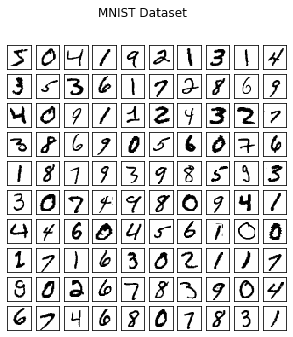

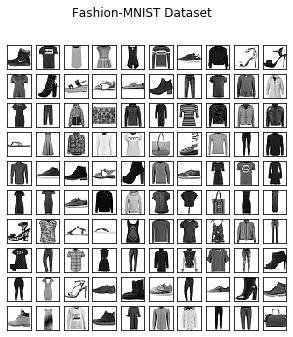

In [4]:

# Plot input data
plot_data(mnist.data, mnist.target, 'MNIST Dataset')
plot_data(fmnist.data, fmnist.target, 'Fashion-MNIST Dataset')


In [5]:

# Parameters
n_samples = np.min([2000, mnist.data.shape[0]])
n_dim_emb = 3
n_neighbours = 10
min_dist = 0.1

# PCA
t0 = time()
model_pca = decomposition.TruncatedSVD(n_components = n_dim_emb)
mnist_data_pca = model_pca.fit_transform(mnist.data[0:n_samples, :])
t1 = time() - t0
print(f'Elapsed time for PCA: {t1} s')

# t-SNE
t0 = time()
model_tsne = manifold.TSNE(n_components = n_dim_emb, perplexity = n_neighbours, init = 'pca', random_state = 0, method = 'barnes_hut')
mnist_data_tsne = model_tsne.fit_transform(mnist.data[0:n_samples, :])
t1 = time() - t0
print(f'Elapsed time for t-SNE: {t1} s')

# UMAP
t0 = time()
model_umap = umap.UMAP(n_components = n_dim_emb, n_neighbors = n_neighbours, min_dist = min_dist, metric = 'correlation', random_state = 0)
mnist_data_umap = model_umap.fit_transform(mnist.data[0:n_samples, :])
t1 = time() - t0
print(f'Elapsed time for UMAP: {t1} s')


Elapsed time for PCA: 0.05094718933105469 s
Elapsed time for t-SNE: 37.41041612625122 s
Elapsed time for UMAP: 9.747946500778198 s


In [6]:

# Plot embeddings
plot_emb(mnist_data_pca, mnist.target[0:num_samples], 'PCA Plot of the MNIST Dataset')
plot_emb(mnist_data_tsne, mnist.target[0:num_samples], 't-SNE Plot of the MNIST Dataset')
plot_emb(mnist_data_umap, mnist.target[0:num_samples], 'UMAP Plot of the MNIST Dataset')


NameError: name 'num_samples' is not defined

In [0]:

# Run times
n = 100
i = int(n_samples / n)
time_pca = np.zeros(i)
time_tsne= np.zeros(i)
time_umap = np.zeros(i)
j = 0
for i in range(0, n_samples, n):

    if i > 0:
        t0 = time()
        _ = decomposition.TruncatedSVD(n_components = n_dim_emb).fit_transform(mnist.data[0:i, :])
        time_pca[j] = time() - t0

        t0 = time()
        _ = manifold.TSNE(n_components = n_dim_emb, perplexity = n_neighbours, init = 'pca', random_state = 0, method = 'barnes_hut').fit_transform(mnist.data[0:i, :])
        time_tsne[j] = time() - t0

        t0 = time()
        _ = umap.UMAP(n_components = n_dim_emb, n_neighbors = n_neighbours, min_dist = min_dist, metric = 'correlation', random_state = 0).fit_transform(mnist.data[0:i, :])
        time_umap[j] = time() - t0
    
    j += 1


In [0]:

fig = plt.figure(figsize = (8, 6))
fig.suptitle('Run Times')
ax = fig.add_subplot(111)
i = range(0, n_samples, n)
ax.plot(i, time_pca, marker = '.', label = 'PCA')
ax.plot(i, time_tsne, marker = '.', label = 't-SNE')
ax.plot(i, time_umap, marker = '.', label = 'UMAP')
plt.setp(ax, xlabel = 'Number of Samples', ylabel = 'Run Time (s)', yscale = 'log')
_ = ax.legend(loc = 'upper left')
    

In [0]:

# FMNIST with UMAP
t0 = time()
model_umap = umap.UMAP(n_components = n_dim_emb, n_neighbors = n_neighbours, min_dist = min_dist, metric = 'correlation', random_state = 0)
fmnist_data_umap = model_umap.fit_transform(fmnist.data[0:n_samples, :])
t1 = time() - t0
print(f'Elapsed time for UMAP: {t1} s')

plot_emb(fmnist_data_umap, fmnist.target[0:n_samples], 'UMAP Plot of the Fashion-MNIST Dataset')
